In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [4]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[ 2.347004  ],
         [-0.53976595],
         [-0.58418065],
         ...,
         [-1.5512638 ],
         [ 0.23953626],
         [ 0.10522224]],

        [[ 1.7519628 ],
         [ 1.0185075 ],
         [-0.15422116],
         ...,
         [ 1.1375499 ],
         [-1.8401388 ],
         [-1.1777478 ]],

        [[ 0.19069201],
         [ 0.62706465],
         [-0.24581772],
         ...,
         [ 0.6945538 ],
         [-0.26143375],
         [-0.22918302]],

        ...,

        [[-2.2905724 ],
         [-0.9438433 ],
         [ 1.0857923 ],
         ...,
         [ 0.59994125],
         [ 0.37993282],
         [ 0.5898637 ]],

        [[-0.05592991],
         [ 0.53020066],
         [ 0.62237203],
         ...,
         [-0.10169059],
         [-0.8007748 ],
         [-1.2834896 ]],

        [[ 1.763335  ],
         [-0.62022054],
         [-0.37145296],
         ...,
         [ 1.010963  ],
         [ 0.260

In [21]:
noise_factor = 0.3
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [22]:
x_test_noisy.shape

TensorShape([10000, 28, 28])

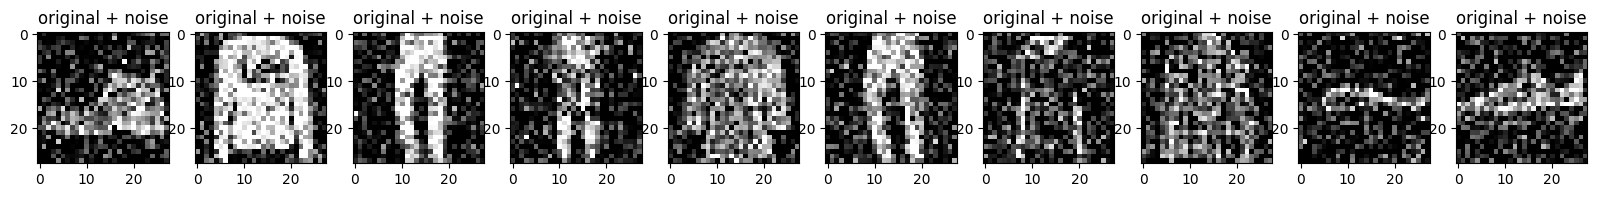

In [23]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [24]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [25]:
autoencoder = Denoise()

In [26]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [27]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - loss: 13261.1025 - val_loss: 0.2300
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - loss: 13301.6074 - val_loss: 0.1013
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - loss: 13260.8936 - val_loss: 0.0725
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - loss: 13262.6992 - val_loss: 0.0680
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 13265.7715 - val_loss: 0.0589
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - loss: 13274.7549 - val_loss: 0.0583
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - loss: 13248.7188 - val_loss: 0.0544
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - loss: 13289.3613 - val_loss: 0.0540
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - loss: 13240.2471 - val_loss: 0.0529
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - loss: 13325.3457 - val_loss: 0.0530
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - 

In [28]:
autoencoder.encoder.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
autoencoder.decoder.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_2 (Conv2DTranspose) │ (32, 14, 14, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (32, 28, 28, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

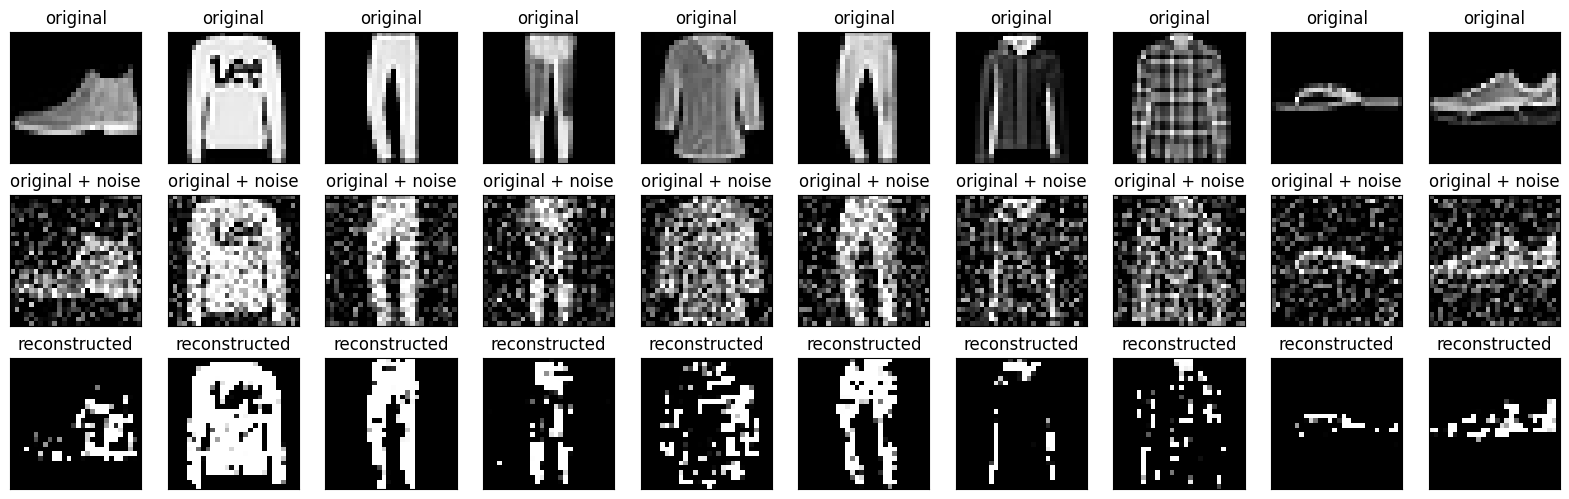

In [31]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Define the Autoencoder class
class Autoencoder(tf.keras.models.Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(np.prod(shape), activation='sigmoid'),
            layers.Reshape(shape),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_test = x_test.astype('float32') / 255.0  # Normalize the test data

# Define model parameters
latent_dim = 64  # Example latent dimension
input_shape = (28, 28)  # Input shape

# Initialize the autoencoder model
autoencoder = Autoencoder(latent_dim, input_shape)

# Predict on test data
x_test_pred = autoencoder.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(x_test.reshape(-1, 28*28), x_test_pred.reshape(-1, 28*28))

print("Mean Squared Error (MSE):", mse)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error (MSE): 0.17038263


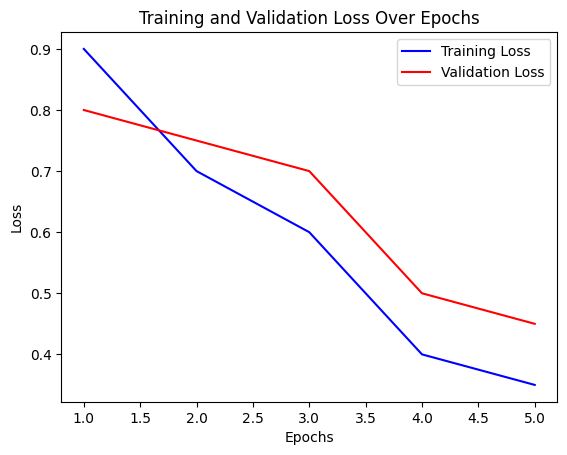

In [33]:
import matplotlib.pyplot as plt

# Assuming you have your training and validation losses stored in lists or arrays
# Example:
train_loss = [0.9, 0.7, 0.6, 0.4, 0.35]  # Replace these with your actual values
val_loss = [0.8, 0.75, 0.7, 0.5, 0.45]  # Replace these with your actual values
epochs = range(1, len(train_loss) + 1)  # Number of epochs

# Plotting the losses
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Display the plot
plt.show()